# Classification 2
sebelumnya:
- Logistic Regression
- K-Nearest Neighbor

kali ini:
- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

In [1]:
# import package disini
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

import seaborn as sns

# import package2 dari sklearn disini
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Naive Bayes
algoritma klasifikasi dengan asumsi kalau 1 fitur itu independen denga fitur lainnya.

di contoh berikut misalnya, asumsinya adalah cuaca dan temperatur tidak memberi efek ke satu sama lain.



In [2]:
# siapin data
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

df = pd.DataFrame({"weather":weather, "temperature":temp, "play":play})
df

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [3]:
# data preparation
# missing value, invalid value, tipe data, 
# encoding, scaling, split jadi training dan testing data

# encoding, mengubah data tipe string jadi angka
encoder = LabelEncoder()

df["weather_en"] = encoder.fit_transform(df["weather"])
print("Class untuk weather:", encoder.classes_)

df["temp_en"] = encoder.fit_transform(df["temperature"])
print("Class untuk temperature:", encoder.classes_)

df["play_en"] = encoder.fit_transform(df["play"])
print("Class untuk play:", encoder.classes_)

display(df)

Class untuk weather: ['Overcast' 'Rainy' 'Sunny']
Class untuk temperature: ['Cool' 'Hot' 'Mild']
Class untuk play: ['No' 'Yes']


,weather,temperature,play,weather_en,temp_en,play_en
0,Sunny,Hot,No,2,1,0
1,Sunny,Hot,No,2,1,0
2,Overcast,Hot,Yes,0,1,1
3,Rainy,Mild,Yes,1,2,1
4,Rainy,Cool,Yes,1,0,1
5,Rainy,Cool,No,1,0,0
6,Overcast,Cool,Yes,0,0,1
7,Sunny,Mild,No,2,2,0
8,Sunny,Cool,Yes,2,0,1
9,Rainy,Mild,Yes,1,2,1


In [4]:
features = df[["weather_en", "temp_en"]]
target = df["play_en"]

In [5]:
# membuat dan melatih model
model = GaussianNB().fit(features, target)

In [13]:
# evaluasi
y_pred = model.predict(features)
print(classification_report(target, y_pred))

# function untuk membuat confusion matrix jadi lebih menarik secara visual
def visualizeCM(cm):    
    nolabels = len(cm)
    fig, ax = plt.subplots(figsize=(nolabels, nolabels))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs', color='black')
    ax.xaxis.set(ticks=range(nolabels))
    ax.yaxis.set(ticks=range(nolabels))
    ax.set_ylim(nolabels-0.5, -0.5)
    for i in range(nolabels):
        for j in range(nolabels):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()
    
visualizeCM(confusion_matrix(target, y_pred))

ValueError: operands could not be broadcast together with shapes (14,2) (13,) 

# Naive Bayes dengan data wine

In [7]:
# siapin data
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine["label"] = wine.target

In [8]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [10]:
# data preparation
# missing value, invalid value, tipe data, 
# encoding, scaling, split jadi training dan testing data

# split data jadi training dan testing dataset
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0, test_size=0.2)

print(x_train.shape, x_test.shape)

(142, 13) (36, 13)


In [11]:
# buat dan latih model
model = GaussianNB().fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.81      0.90        16
           2       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



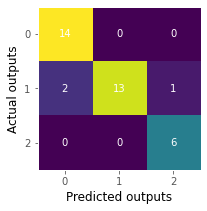

In [12]:
# evaluasi model
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

visualizeCM(confusion_matrix(y_test, y_pred), 3)

# Decision Tree
